<center><img src="https://upload.wikimedia.org/wikipedia/commons/a/aa/FIFA_logo_without_slogan.svg" width="240" height="100" /></center>

# <center><b>FIFA 21 Player Analysis<b></center>


#  Installing & Importing Libraries


###  Installing Libraries

In [27]:
#!pip install -q datascience                                   # Package that is required by pandas profiling      
#!pip install -q pandas-profiling                              # Library to generate basic statistics about data     

In [28]:
#!pip install -q --upgrade datascience                             # Package that is required by pandas profiling  
#!pip install -q --upgrade pandas-profiling                        # Library to generate basic statistics about data  
#!pip install --upgrade -q plotly
#!pip install -q pyyaml==5.4.1


### Importing Libraries

In [29]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # To perform data profiling
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # For numerical python operations
#-------------------------------------------------------------------------------------------------------------------------------
%matplotlib inline
import matplotlib.pyplot as plt                                     # A popular plotting library used along with pandas
import seaborn as sns                                               # A library, built on matplotlib, for beautiful plots
import plotly.graph_objs as go                                      # For interactive graphs
import plotly.express as px                                         # For interactive graphs
#-------------------------------------------------------------------------------------------------------------------------------
import random                                                       # To shuffle lists
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

##  Data Importing

In [30]:
data = pd.read_csv('players_21.csv')
print('Dataset Shape:', data.shape)
data.head()

Dataset Shape: (18944, 106)


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/210002,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, #Acrobat, #Clinical Finisher, #Complete Forward",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Dribbler (AI), Playmaker (AI), Outside Foot Shot, One Club Player, Team Player, Chip Shot (AI)",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-santos-aveiro/210002,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, #Acrobat, #Clinical Finisher, #Complete Forward",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), Speed Dribbler (AI), Outside Foot Shot",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewandowski/210002,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot, Chip Shot (AI)",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,


###  Data Description

In [31]:
data.describe()

,sofifa_id,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18944.000000,18944.000000,18944.000000,18944.000000,18719.000000,18944.000000,18944.000000,1.894400e+04,18944.000000,18944.000000,18944.000000,18944.000000,1.794900e+04,18719.000000,18719.000000,1127.000000,16861.000000,16861.000000,16861.000000,16861.000000,16861.000000,16861.000000,2083.000000,2083.000000,2083.000000,2083.000000,2083.000000,2083.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,0.0,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000
mean,226242.402872,25.225823,181.190773,75.016892,1.357070,65.677787,71.086729,2.224813e+06,8675.852513,1.091850,2.936603,2.363017,4.296353e+06,20.589668,2021.983332,12.029281,67.668110,52.274954,57.139434,62.455430,51.316292,64.458988,65.164186,62.889102,61.719635,66.108017,37.203553,63.171867,49.612859,45.796083,51.874578,58.705448,42.669552,55.546400,47.187289,42.356155,52.653030,58.482791,64.285103,64.326489,63.333193,61.609428,63.918549,57.752798,64.590530,62.596020,64.742927,46.758763,55.488862,46.250000,50.255807,53.828231,48.050412,57.978674,NaN,47.581767,45.546505,16.446052,16.236486,16.103357,16.225982,16.551309
std,27171.091056,4.697354,6.825672,7.057140,0.739327,7.002278,6.109985,5.102486e+06,19654.774894,0.361841,0.667132,0.766469,1.005968e+07,17.057568,1.260426,6.674627,10.984862,13.991421,10.273655,10.048706,16.405179,9.746706,7.710474,7.328945,7.575184,8.126601,10.714523,8.565969,18.153057,19.592269,17.321709,14.572383,17.661569,18.787112,18.231204,17.239561,15.205281,16.598040,14.926452,14.689422,14.625189,9.112954,14.075215,13.330631,11.888479,15.878793,12.519775,19.305319,17.203045,20.738106,19.443738,13.724072,15.671721,12.118390,NaN,21.402461,20.953997,17.577332,16.845480,16.519399,17.017341,17.878121
min,41.000000,16.000000,155.000000,50.000000,1.000000,47.000000,47.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,9.000000e+03,1.000000,2020.000000,1.000000,25.000000,16.000000,25.000000,25.000000,15.000000,28.000000,45.000000,43.000000,35.000000,44.000000,12.000000,38.000000,6.000000,3.000000,5.000000,7.000000,3.000000,5.000000,4.000000,5.000000,5.000000,5.000000,13.000000,12.000000,14.000000,24.000000,12.000000,18.000000,15.000000,12.000000,16.000000,4.000000,9.000000,3.000000,2.000000,9.000000,6.000000,12.000000,NaN,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,210030.500000,21.000000,176.000000,70.000000,1.000000,61.000000,67.000000,3.000000e+05,1000.000000,1.000000,3.000000,2.000000,5.250000e+05,9.000000,2021.000000,6.000000,62.000000,42.000000,50.000000,57.000000,36.000000,58.000000,60.000000,58.000000,57.000000,60.000000,28.000000,57.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,35.000000,31.000000

#### **Observations:**

- #### **Player Information**:

>- **age** ranges from **16** to **53**, averaging at **25.23**.

>- **height_cm** ranges from **155** to **206**, averaging at **181.19**.

>- **weight_kg** ranges from **50** to **110**, averaging at **75.02**.

>- **league_rank** ranges from **1.0** to **4.0**, averaging at **1.36**.

>- **overall** ranges from **47** to **93**, averaging at **65.68**.

>- **potential** ranges from **47** to **95**, averaging at **71.09**.

>- **value_eur** ranges from **0** to **105500000**, averaging at **2224813.29**.

>- **wage_eur** ranges from **0** to **560000**, averaging at **8675.85**.

>- **skill_moves** ranges from **1** to **5**, averaging at **2.36**.

>- **release_clause_eur** ranges from **9000.0** to **203100000.0**, averaging at **4296353.06**.



- #### **General Skills**:

>- **pace** ranges from **25.0** to **96.0**, averaging at **67.67**.

>- **shooting** ranges from **16.0** to **93.0**, averaging at **52.27**.

>- **passing** ranges from **25.0** to **93.0**, averaging at **57.14**.

>- **dribbling** ranges from **25.0** to **95.0**, averaging at **62.46**.

>- **defending** ranges from **15.0** to **91.0**, averaging at **51.32**.

>- **physic** ranges from **28.0** to **91.0**, averaging at **64.46**.

>- **attacking_crossing** ranges from **6** to **94**, averaging at **49.61**.

>- **attacking_finishing** ranges from **3** to **95**, averaging at **45.8**.

>- **attacking_heading_accuracy** ranges from **5** to **93**, averaging at **51.87**.

>- **attacking_short_passing** ranges from **7** to **94**, averaging at **58.71**.

>- **attacking_volleys** ranges from **3** to **90**, averaging at **42.67**.

>- **skill_dribbling** ranges from **5** to **96**, averaging at **55.55**.

>- **skill_curve** ranges from **4** to **94**, averaging at **47.19**.

>- **skill_fk_accuracy** ranges from **5** to **94**, averaging at **42.36**.

>- **skill_long_passing** ranges from **5** to **93**, averaging at **52.65**.

>- **skill_ball_control** ranges from **5** to **96**, averaging at **58.48**.

>- **movement_acceleration** ranges from **13** to **97**, averaging at **64.29**.

>- **movement_sprint_speed** ranges from **12** to **96**, averaging at **64.33**.

>- **movement_agility** ranges from **14** to **96**, averaging at **63.33**.

>- **movement_reactions** ranges from **24** to **95**, averaging at **61.61**.

>- **movement_balance** ranges from **12** to **97**, averaging at **63.92**.

>- **power_shot_power** ranges from **18** to **95**, averaging at **57.75**.

>- **power_jumping** ranges from **15** to **95**, averaging at **64.59**.

>- **power_stamina** ranges from **12** to **97**, averaging at **62.6**.

>- **power_strength** ranges from **16** to **97**, averaging at **64.74**.

>- **power_long_shots** ranges from **4** to **94**, averaging at **46.76**.

>- **mentality_aggression** ranges from **9** to **96**, averaging at **55.49**.

>- **mentality_interceptions** ranges from **3** to **91**, averaging at **46.25**.

>- **mentality_positioning** ranges from **2** to **95**, averaging at **50.26**.

>- **mentality_vision** ranges from **9** to **95**, averaging at **53.83**.

>- **mentality_penalties** ranges from **6** to **92**, averaging at **48.05**.

>- **mentality_composure** ranges from **12** to **96**, averaging at **57.98**.

>- **defending_marking** ranges from **nan** to **nan**, averaging at **nan**.

>- **defending_standing_tackle** ranges from **5** to **93**, averaging at **47.58**.

>- **defending_sliding_tackle** ranges from **4** to **90**, averaging at **45.55**.

- #### **Goalkeeping Skills**:

>- **gk_diving** ranges from **45.0** to **90.0**, averaging at **65.16**.

>- **gk_handling** ranges from **43.0** to **92.0**, averaging at **62.89**.

>- **gk_kicking** ranges from **35.0** to **93.0**, averaging at **61.72**.

>- **gk_reflexes** ranges from **44.0** to **90.0**, averaging at **66.11**.

>- **gk_speed** ranges from **12.0** to **65.0**, averaging at **37.2**.

>- **gk_positioning** ranges from **38.0** to **91.0**, averaging at **63.17**.

>- **goalkeeping_diving** ranges from **1** to **90**, averaging at **16.45**.

>- **goalkeeping_handling** ranges from **1** to **92**, averaging at **16.24**.

>- **goalkeeping_kicking** ranges from **1** to **93**, averaging at **16.1**.

>- **goalkeeping_positioning** ranges from **1** to **91**, averaging at **16.23**.

>- **goalkeeping_reflexes** ranges from **1** to **90**, averaging at **16.55**.


### Data Information

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Columns: 106 entries, sofifa_id to rb
dtypes: float64(18), int64(44), object(44)
memory usage: 15.3+ MB


**Observations:**

- There are **18 float64 features**, **44 int64 features** and **44 object data type** features.

- We will see the **profiling report** to get more information on these features.


# Data Pre-Profiling

- For quick analysis pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column, statistics are presented in an interactive HTML report.

In [33]:
# profile = ProfileReport(df=data)
# profile.to_file(output_file='Pre Profiling Report.html')
# print('Accomplished!')

**Observations:**

- This profiling report took **13 minutes to generate**. Don't generate reports for such large datasets.

In [34]:
data.isna().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club_name                       225
league_name                     225
league_rank                     225
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur              995
player_tags                   17536
team_position                   225
team_jersey_number          

**Observations:**

- Many Features have **missing values**, since for a lot of non-goal-keeping players, goal-keeping skill ratings don't matter.

- We **won't impute most of the null values** as we may lose important information or insert unintended information into our dataset.


# Data Pre-Processing


- Firstly, we will rename ***some*** column names according to our requirements.

- Further, we will only use the first mentioned positions of the player in the player_position feature. For example: **Lionel Messi** plays **RW, ST, CF**. But we will only **extract and use RW (Right Wing)** since it is his primary position.

- Also, we will **assign a fuzzy position name** to the extracted position. This wil be helpful to **compare and judge similar players**. The following table shows the conversion:

| Actual Position | Converted Position |
| :--: | :--: |
| ST, CF | ST |
| LW, RW, LM, RM | WF |
| CAM, CDM, CM | CM |
| LWB, RWB, LB, RB | WB |
| CB | CB |
| GK | GK |


- We will also set up a new column 'Right Foot', using a number [-5,5] to indicate how much the player's right foot is stronger than the left foot. For example, **Messi's 'Right Foot'** is **-1**, while **Ronaldo's is 1**.

- The data in column '**Marking**' is empty so we will use the column '**DEF**' to roughly estimate the missing values in '**Marking**'.

- In football, **Marking** is an **organized defensive tactic** which aims to prevent a member of the opposing team from **taking control of the ball**.


In [35]:
# Renaming columns

data.rename(columns={'height_cm':'Height(cm)','weight_kg':'Weight(kg)','skill_moves':'Skill Moves',
                     'attacking_crossing':'Crossing','attacking_finishing':'Finishing',
                     'attacking_heading_accuracy':'Heading Accuracy','attacking_short_passing':'Short Passing',
                     'attacking_volleys':'Volleys','skill_dribbling':'Dribbling',
                     'skill_curve':'Curve','skill_fk_accuracy':'FK. Accuracy',
                     'skill_long_passing':'Long Passing','skill_ball_control':'Ball Control',
                     'movement_acceleration':'Acceleration','movement_sprint_speed':'Sprint Speed',
                     'movement_agility':'Agility','movement_reactions':'Reactions',
                     'movement_balance':'Balance','power_shot_power':'Shot Power',
                     'power_jumping':'Jumping','power_stamina':'Stamina',
                     'power_strength':'Strength','power_long_shots':'Long Shots',
                     'mentality_aggression':'Aggression','mentality_interceptions':'Interceptions',
                     'mentality_positioning':'Positioning','mentality_vision':'Vision',
                     'mentality_penalties':'Penalties','mentality_composure':'Composure',
                     'defending_marking':'Marking','defending_standing_tackle':'Standing Tackle',
                     'defending_sliding_tackle':'Sliding Tackle'}, inplace=True)

# Creating a function that extracts the primary position
def sim_pos(row):
  '''
  row : takes the input as the row where the transformation is needed.
  It extracts the very first player position using the partition method
  of a dataframe,
  '''

  return row.player_positions.partition(',')[0]

# Creating a function that assigns a value to determine strongness of right foot
def foot_trans(row):
  '''
  row : takes the input as the row where the transformation is needed.
  It works in conjunction with 'weak_foot' to create a new column
  named as 'Right Foot' and assigns a score between -5 to 5 for right foot.
  '''

  if row.preferred_foot=='Right':
      return 5-row.weak_foot
  else:
      return row.weak_foot-5

# Creating a function that renames positions with fuzzy positions    
def pos_trans(row):
  '''
  row : takes the input as the row where the transformation is needed.
  It works in conjunction with 'player_positions' to create a new column
  named as 'rough_position'.
  '''

  if row.player_positions in ['ST','CF']:
      return 'ST'
  if row.player_positions in ['LW','RW','LM','RM']:
      return 'WF'
  if row.player_positions in ['CAM','CDM','CM']:
      return 'MF'
  if row.player_positions in ['LWB','RWB','LB','RB']:
      return 'WB'
  if row.player_positions in ['CB']:
      return 'CB'
  if row.player_positions in ['GK']:
      return 'GK'

def calc_marking(row):
  '''
  row : takes the input as the row where the transformation is needed.
  '''
  if row['player_positions']!='GK':
    return int((10*row['defending']-3*row['Standing Tackle']-2*row['Interceptions']-row['Heading Accuracy']-row['Sliding Tackle'])/3) 
  else:
    return np.nan
    
data['player_positions']=data.apply(sim_pos, axis=1)
data['Right Foot']=data.apply(foot_trans, axis=1)
data['rough_position']=data.apply(pos_trans, axis=1)
data['Marking']=data.apply(calc_marking, axis=1)

In [36]:
data.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,Height(cm),Weight(kg),nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,Skill Moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK. Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,Right Foot,rough_position
0,158023,https://sofifa.com/player/158023/lionel-messi/210002,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,RW,Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, #Acrobat, #Clinical Finisher, #Complete Forward",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Dribbler (AI), Playmaker (AI), Outside Foot Shot, One Club Player, Team Player, Chip Shot (AI)",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,33.0,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,-1,WF
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-santos-aveiro/210002,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,ST,Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, #Acrobat, #Clinical Finisher, #Complete Forward",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), Speed Dribbler (AI), Outside Foot Shot",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,27.0,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,1,ST
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3,2,GK
3,188545,https://sofifa.com/player/188545/robert-lewandowski/210002,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot, Chip Shot (AI)",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,34.0,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,1,ST
4,190871,https://sofifa.com/player/190871/neymar-


# Exploratory Data Analysis

**<h4>Question:** What are the descriptive statistics of some of the top players?</h4>

- We will select 'short_name', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic' features for some of the popular players in this dataset.

- Some of the players that can be searched for in this dataset include
<center> 
1. Cristiano Ronaldo - Juventus
2. Lionel Messi - Barcelona
3. Virgil Van Dijk - Liverpool
4. Toni Kroos - Real Madrid
5. N. Kanté - Chelsea
6. Sergio Ramos - Real Madrid
7. K. Mbappé - PSG
8. Neymar Jr - PSG
9. M. Salah - Liverpool
10. R. Lewandowski - Bayern
11. K. Benzema - Real Madrid
</center> 

**Methods** **Used**:

- set_caption(): Self-explanatory - Give a caption to your table.

- set_table_styles(): This function can be used to style the entire table, columns, rows or specific HTML selectors. Blue color is used to display a hovered row (name in this case) using 'selector' attribute of html.

- set_precision(): Display floating point precision of various stats.

- background_gradient(): To display colors based on statistical values.

In [37]:
# Creating a new dataframe - top_player
top_player =  data[data.short_name.isin(['L. Messi', 'Cristiano Ronaldo', 'R. Lewandowski', 'K. De Bruyne', 'K. Mbappé', 'Neymar Jr', 'Sergio Ramos', 'N. Kanté', 'T. Kroos', 'M. Salah', 'K. Benzema', 'G. Bale'])]
top_player = top_player[['short_name', 'club_name', 'rough_position', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'overall']].reset_index(drop=True)

# Formatted table output
top_player.style\
          .set_caption('Top players')\
          .set_table_styles([{'selector': 'tr:hover','props': [('background-color', '#0080ff')]}])\
          .set_precision(0)\
          .background_gradient(cmap='Greens')

,short_name,club_name,rough_position,pace,shooting,passing,dribbling,defending,physic,overall
0,L. Messi,FC Barcelona,WF,85,92,91,95,38,65,93
1,Cristiano Ronaldo,Juventus,ST,89,93,81,89,35,77,92
2,R. Lewandowski,FC Bayern München,ST,78,91,78,85,43,82,91
3,Neymar Jr,Paris Saint-Germain,WF,91,85,86,94,36,59,91
4,K. De Bruyne,Manchester City,MF,76,86,93,88,64,78,91
5,K. Mbappé,Paris Saint-Germain,ST,96,86,78,91,39,76,90
6,M. Salah,Liverpool,WF,93,86,81,90,45,75,90
7,Sergio Ramos,Real Madrid,CB,71,70,76,73,88,85,89
8,K. Benzema,Real Madrid,ST,74,85,81,86,40,76,89
9,T. Kroos,Real Madrid,MF,54,81,91,81,71,69,88


**Observations**:

- Most of the players can be seen **specializing in atleast one of the skills**.

**<h4>Question:** So now we saw some attributes of players, What are the attribute comparison between your favorite players?</h4>

- By default, we have chosen **Ronaldo** and **Messi** - duh!

- But you can use `compare_players()` function to **compare any** **n** number of players by **typing their names**.

In [38]:
def compare_players(list_of_players):
  '''
    The function accepts the names of players whose stats we want to compare.
  '''
  names = list_of_players
  fig = go.Figure()

  # The stats we are using to compare, Feel free to use your own stats.
  stats = ['pace','shooting','passing','dribbling','defending','Acceleration', 'pace']
  for name in names:
    # Extract player stats based on name
    player_stats = data[data['short_name'].str.contains(name)][stats]

    fig.add_trace(go.Scatterpolar(
                      # Passing numeric parameters
                      r=player_stats.iloc[0],
                      # Passing parameter names
                      theta=['Pacing', 'Shooting', 'Passing', 'Dribbling', 'Defending', 'Acceleration', 'Pacing'],
                      # Setting the fill parameter
                      fill='toself',
                      # Specify the signature on hover
                      hovertemplate='<b>%{theta}</b>' + f'<b>: '+'%{r}',
                      # Specify a caption for the legend
                      name=name,
                      opacity=0.6))
    
    fig.update_layout(
          # Set the name of the chart
          title='Comparison between players',
          # Setting the background color
          paper_bgcolor="rgb(223, 223, 223)",
          # Setting the chart theme
          template='xgridoff',
          # Passing chart parameters
          polar=dict(
                     # Background color
                     bgcolor="rgba(223, 223, 223, 0.6)",
                     # Adding a line with numeric divisions
                     radialaxis=dict(
                                     # Displaying the line
                                     visible = True,
                                     # Set the range of divisions
                                     range = [0, 100]
                                     )
                    )
      )

      
  fig.show()

In [39]:
list_of_players = ['L. Messi', 'Cristiano Ronaldo']
compare_players(list_of_players)

**Observations**:

- Both players have almost similar attributes - with **Messi** excelling at **passing** and **Ronaldo** excelling at **pacing**.

- Let's compare some **other notable players**:

In [40]:
compare_players(['Neymar Jr', 'Pogba', 'K. Mbappé'])

**Observations**:

- We can see that Mbappe leads the chart in 3 attributes - Acceleration, Shooting and pacing.

- **Neymar** leads the chart in **Dribbling** and **shares** the top spot with **Pogba** for **passing**.

- **Pogba** also leads in **defending** as he is a defender, unlike the other two who are in attack positions.

**<h4>Question:** What is the proportion of players in each position?</h4>

In [41]:
data['player_positions'].nunique()

15

In [42]:
stat_pos = pd.DataFrame(data['player_positions'].value_counts())
print(stat_pos)


     player_positions
CB               3252
ST               2645
CM               2241
GK               2084
CDM              1514
LB               1402
RB               1363
CAM              1148
LM               1069
RM               1065
RW                438
LW                420
CF                115
LWB               100
RWB                88


In [43]:
all_pos=data['player_positions'].unique()
sta_pos=pd.DataFrame(np.zeros(15).reshape(1,15),columns=all_pos)

def add(row):
  '''
  Adds a value by 1 everytime a particular position is detected.
  For Example: Adds 1 to ST column if a player's position is ST (Striker) 
  '''
  sta_pos[row.player_positions][0]+=1
    
data.apply(add,axis=1)
sta_pos=sta_pos.loc[:,~(sta_pos==0).all()]

sta_pos

,RW,ST,GK,LW,CAM,CB,CF,CDM,CM,RM,RB,LB,LM,RWB,LWB
0,438.0,2645.0,2084.0,420.0,1148.0,3252.0,115.0,1514.0,2241.0,1065.0,1363.0,1402.0,1069.0,88.0,100.0


In [44]:
# Displaying the distribution of positions
fig = px.pie(sta_pos, values=sta_pos.loc[0,:], names=sta_pos.columns)

# Update the trace
fig.update_traces(textposition='inside', textinfo='percent+label')

# Update the layout with some cosmetics
fig.update_layout(height=600, 
                  width=1000, 
                  title_text='Proportion of Each Position',
                  title_x=0.5)

fig.update_traces(textfont_size=12,
                  marker=dict(line=dict(color='#000000',
                                        width=2)))

fig.show()

**Observations**:

- We can see that **CB**, **ST**, **CM**, and **GK** have **significant proportions** as compared to the rest of the positions

**<h4>Question:** What are the basic attributes' distribution for non-GK players?</h4>



- Let's Distribute the players as Goalkeepers and Non-Goalkeepers:

In [45]:
# Goalkeepers
gkdata=data[data['player_positions']=='GK']
gkdata=gkdata.dropna(axis=1,how='all')
gkdata=gkdata.dropna(axis=0,how='any',subset=('gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning'))

# Non-Goalkeepers
nogkdata=data[data['player_positions']!='GK']
nogkdata=nogkdata.dropna(axis=1,how='all')
nogkdata=nogkdata.dropna(axis=0,how='any',subset=('pace','shooting','passing','dribbling','defending','physic','pace'))

- Finding **attribute distribution** for **non-GK players**:

In [46]:
nogklabel=['PAC','SHO','PAS','DRI','DEF','PHY']
nogkcol=['pace','shooting','passing','dribbling','defending','physic']
nogkval=[nogkdata.loc[:,i] for i in nogkcol]

fig=go.Figure()
for label, val in zip(nogklabel, nogkval):
    fig.add_trace(go.Box(
        y=val,
        name=label,
        boxpoints='outliers',
        pointpos=-1.2,
        marker_color='green',
        line_color='purple'
    ))
fig.update_layout(title_text="Non-GK Boxplot")
fig.show()

**Observations**:

- **Pacing** is one of the most important attributes, along with physic (physique) and we can see that most of the players have a good value for these attributes.

- **Shooting** and **Defending** have the **widest range** among all the attributes, indicating they are **essential for all the positions** in the field.

- Dribbling and Passing are **more skill based** and we can see **lower fences** for both attributeswith scores **in mid 30s**.

**<h4>Question:** What are the basic attributes' distribution for GK players?</h4>


In [47]:
gklabel=['DIV','HAN','KIC','REF','SPD','POS']
gkcol=['gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning']
gkval=[gkdata.loc[:,i] for i in gkcol]

fig=go.Figure()
for label, val in zip(gklabel, gkval):
    fig.add_trace(go.Box(
        y=val,
        name=label,
        boxpoints='outliers',
        pointpos=-1.2,
        marker_color='red',
        line_color='blue'
    ))
fig.update_layout(title_text="GK Boxplot")
fig.show()

**Observations**:

- **Speed** (Pacing) is **not the priority attribute** required to be a goalkeeper and we can see that based on the boxplot.

- **Reflexes, Diving** and **Positioning** are **essential for a goalkeeper** in a match and we can see that their **scores** for those **attributes are high**.

**<h4>Question:** What are ratings of the various clubs in this dataset?</h4>

In [48]:
# Create a overall rating for each club based on overall rating of it's players
club_overall = data.groupby('club_name')['overall'].mean().sort_values(ascending = False).head(20)

# Extract labels and values of top clubs
values = club_overall
labels = club_overall.index
colors = ['blue', 'red', 'yellow', 'green', 'cornsilk', 'grey', 'darkorange', 'purple', 'burlywood', 'magenta', 'mediumturquoise', 'lightgreen', 'gold', 'violet', 'brown', 'slateblue', 'pink', 'olive', 'chocolate', 'cyan']
random.shuffle(colors)

# Initiate an empty figure
fig = go.Figure()

# Add a trace of bar to the figure
fig.add_trace(trace=go.Bar(x=values,
                           y=labels,
                           orientation='h'))

# Update the layout with some cosmetics
fig.update_layout(height=600, 
                  width=1000, 
                  title_text='Average rating of each football club', 
                  title_x=0.5, 
                  xaxis_title='Average Rating', 
                  yaxis_title='Club Name'
                  )

fig.update_traces(marker_color=colors,
                  marker_line_color='black',
                  marker_line_width=1.5,
                  opacity=0.6)

# Display the figure
fig.show()

**Observations**:

- **FC Bayern Munchen** holds the top spot, followed by **Real Madrid**, **Chelsea**, **FC Barcelona**, and **Liverpool**.

- Other popular clubs also include **Arsenal**, **Tottenhan Hotspur**, **Manchester United**, **Manchester City**, **Paris Saint-Germain**, etc.

**<h4>Question:** What are attribute distribution of various clubs in this dataset?</h4>

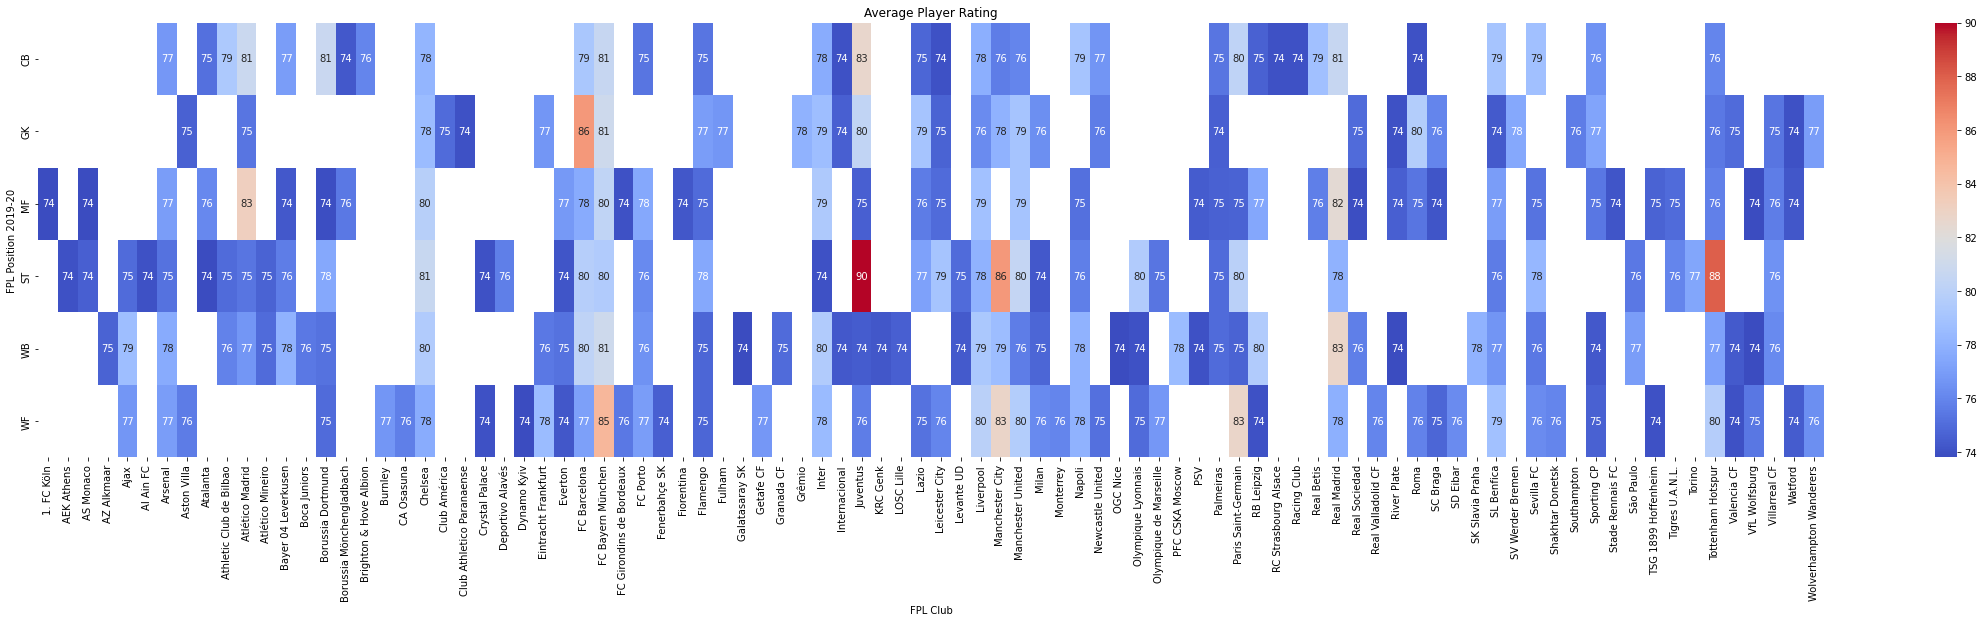

In [49]:
club_pos_overall = data.groupby(by = ['club_name', 'rough_position'], as_index = False)['overall'].mean().sort_values(by='overall', ascending = False).head(250)

club_pos_overall = club_pos_overall.pivot_table(values = 'overall', index = ['rough_position'], columns = 'club_name')

club_pos_overall.index = ['CB', 'GK', 'MF', 'ST', 'WB', 'WF']

# Create a figure and a heatmap
plt.figure(figsize=(40,8))
sns.heatmap(data=club_pos_overall, annot=True, cmap = 'coolwarm')

# Add Cosmetics
plt.title("Average Player Rating")
plt.xlabel("FPL Club")
plt.ylabel("FPL Position 2019-20")
plt.show()

**Observations**:

- There are **681 unique clubs** identified in this dataset, so we will consider around 200 clubs.

- We can see that some positions **are not occupied** in some teams.

- The top spot is taken by **Juventus's Striker**, followed by **Tottenham Hotspur's** and **Manchester City's Strikers**.

- These are followed by **FC Barcelona's Goalkeeper**.

**<h4>Question:** What are earnings of various players in this dataset?</h4>

In [50]:
fig = px.scatter(data ,x='short_name', y='value_eur', color='player_positions',
                 labels={'value_eur': 'Value in Euro', 'player_positions':'Position'})

fig.update_xaxes(visible=False)

fig.update_layout(title_text='Value in Euro per Position', title_x=0.5)

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,)),
                  selector=dict(mode='markers'))

fig.show()

**Observations**:

- **Paris Saint-Germain Striker** **Kylian Mbappé Lottin** is the **highest valued player** (and Striker) in FIFA with **105.5M Euros**.

- He is followed by the **Left Winger Neymar Jr.** with **90M Euros** and **Central Attacking Midfielder Kevin De Bruyne** with **87M Euros**.

- A fine line can be made **between 35-40M Euros** which indicates that most of that players are **valued below that line**, and the **popular players, above that line**.

**<h4>Question:** What is the age distribution of various clubs?</h4>

In [51]:
# Filtering clubs of choice
clubs = data[data['club_name'].isin(['FC Bayern München', 'Real Madrid', 'Chelsea', 'FC Barcelona', 'Liverpool', 'Juventus', 'Manchester United', 'Manchester City'])]

# Creating a violin plot for each club
fig = px.violin(clubs,
                y="age",
                color='club_name',
                box=True)

# Displaying the age distribution
fig.show()

**Observation**:

- Juventus has the **widest age distribution** with their **eldest** player being aged **42 years** and **youngest** being **19 years old**.

- Rest of the teams seem to have an **average age gap of 17 years** between their eldest and youngest players, with the **median age** being **24 years**.

**<h4>Question:** What is the distribution of nationalities of the FIFA Players?</h4>

In [52]:
nations = data
nations['nationality'] = nations['nationality'].str.replace('England', 'UK')
nations = nations['nationality'].value_counts()

trace = [go.Choropleth(
            locationmode = 'country names',
            locations = nations.index,
            z = nations.values,
)]

layout = go.Layout(title = 'Count of Players from various countries',)

fig = go.Figure(data = trace, layout = layout)
fig.show()

**Observations**:

- **Most** of the players are from the **UK** (England in the dataset).

- We can see that next most number of the players from a lot of the European countries like **France**, **Spain**, and **Germany**.

- We can also see a lot of players from **Brazil** and **Argentina** as well.


#  Summarization


###  Conclusion

- We had to limit ourselves to a **lesser number of features** to carry out the analysis.

- The **skillsets** had to be **generalized** to make our analysis easier.

- **Paris Saint-Germain's** **Kylian Mbappé Lottin** is the **highest valued player** (and Striker) in FIFA with **105.5M Euros**, followed by the **Neymar Jr.** with **90M Euros** and **Kevin De Bruyne** with **87M Euros**.

- Messi is the highest rated player in the FIFA records.

- Both players - Messi and Ronaldo have almost similar attributes - with **Messi** excelling at **passing** and **Ronaldo** excelling at **pacing**.

- **CB**, **ST**, **CM**, and **GK** have **significant proportions** as compared to the rest of the positions.

- **Pacing**, **Shooting** and **Defending** are some of the most important attributes for a non-GK player as we observed that these attributes have higher values in distribution for players.

- Similarly, **Reflexes, Diving** and **Positioning** are **essential for a goalkeeper** in a match.

- There are **681 unique clubs** identified in this dataset.

- **FC Bayern Munchen** holds the top spot in **average rating of teams**, followed by **Real Madrid**, **Chelsea**, **FC Barcelona**, and **Liverpool**.

- The **median age** of players in a club seem to be **24 years**, with an **age gap** as **wide as 23 years** between eldest and youngest players.

- European countries like **UK, France**, and **Germany**, along with **Brazil** and **Argentina** have produced a significant number of international footballers.